In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/Randomforest/developing/BL14_genepromSM_0.7.txt_result_dupindex_binnedstats.pkl_test.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']

###########inbindf=inbindf.reset_index()
inbindf.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,label,Last,label2
952025,mNeu.HWI-ST539_128:8:2208:11901:22353#0,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.0,CD4-others,0.724654,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,mNeu,HWI-ST539_128:8:2208:11901:22353#0,NOTCD4
1300617,nB.HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.0,CD4-others,0.745026,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,nB,HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,NOTCD4
1314716,Eo.HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,0.711910,-0.073885,-0.222141,-0.200962,-0.222141,-0.214962,0.017295,-0.210654,-0.057013,...,1.0,CD4-others,0.711910,CD4-others,0.711910,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Eo,HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,NOTCD4
1078823,CD8.HWI-ST699_224:5:2316:6202:27084#19,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,CD4-others,0.751897,CD4-others,0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD8,HWI-ST699_224:5:2316:6202:27084#19,NOTCD4
663738,CD4.HWI-ST699_224:7:2109:12002:60846#12,1.458179,1.285513,-0.448692,0.051359,-0.232231,-0.369718,-0.239231,-0.312282,-0.439000,...,1.0,CD4-others,1.458179,CD4-others,1.458179,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST699_224:7:2109:12002:60846#12,CD4


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,label,Last,label2
952025,mNeu.HWI-ST539_128:8:2208:11901:22353#0,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.0,CD4-others,0.724654,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,mNeu,HWI-ST539_128:8:2208:11901:22353#0,NOTCD4
1300617,nB.HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.0,CD4-others,0.745026,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,nB,HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,NOTCD4
1314716,Eo.HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,0.711910,-0.073885,-0.222141,-0.200962,-0.222141,-0.214962,0.017295,-0.210654,-0.057013,...,1.0,CD4-others,0.711910,CD4-others,0.711910,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Eo,HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,NOTCD4
1078823,CD8.HWI-ST699_224:5:2316:6202:27084#19,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.0,CD4-others,0.751897,CD4-others,0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD8,HWI-ST699_224:5:2316:6202:27084#19,NOTCD4
663738,CD4.HWI-ST699_224:7:2109:12002:60846#12,1.458179,1.285513,-0.448692,0.051359,-0.232231,-0.369718,-0.239231,-0.312282,-0.439000,...,1.0,CD4-others,1.458179,CD4-others,1.458179,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST699_224:7:2109:12002:60846#12,CD4


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,label,Last,label2,secondmaxScore,secondmaxScoreCT
952025,mNeu.HWI-ST539_128:8:2208:11901:22353#0,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,0.724654,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,mNeu,HWI-ST539_128:8:2208:11901:22353#0,NOTCD4,Notassigned,Notassigned
1300617,nB.HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.745026,CD4-others,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,nB,HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,NOTCD4,Notassigned,Notassigned
1314716,Eo.HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,0.711910,-0.073885,-0.222141,-0.200962,-0.222141,-0.214962,0.017295,-0.210654,-0.057013,...,0.711910,CD4-others,0.711910,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Eo,HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,NOTCD4,Notassigned,Notassigned
1078823,CD8.HWI-ST699_224:5:2316:6202:27084#19,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.751897,CD4-others,0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD8,HWI-ST699_224:5:2316:6202:27084#19,NOTCD4,Notassigned,Notassigned
663738,CD4.HWI-ST699_224:7:2109:12002:60846#12,1.458179,1.285513,-0.448692,0.051359,-0.232231,-0.369718,-0.239231,-0.312282,-0.439000,...,1.458179,CD4-others,1.458179,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST699_224:7:2109:12002:60846#12,CD4,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscore,deltabasedfragassignment,filename,label,Last,label2,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
952025,mNeu.HWI-ST539_128:8:2208:11901:22353#0,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,...,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,mNeu,HWI-ST539_128:8:2208:11901:22353#0,NOTCD4,0,CD8-others,-0,-0
1300617,nB.HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,nB,HWI-ST700660:310:C7T58ACXX:3:2305:4973:52611,NOTCD4,0,CD8-others,-0,-0
1314716,Eo.HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,0.711910,-0.073885,-0.222141,-0.200962,-0.222141,-0.214962,0.017295,-0.210654,-0.057013,...,0.711910,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,Eo,HWI-ST539:250:C7T3PACXX:1:2106:9545:98822,NOTCD4,0.537449,m4-others,0.174462,0.443186
1078823,CD8.HWI-ST699_224:5:2316:6202:27084#19,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD8,HWI-ST699_224:5:2316:6202:27084#19,NOTCD4,0,CD8-others,0,0
663738,CD4.HWI-ST699_224:7:2109:12002:60846#12,1.458179,1.285513,-0.448692,0.051359,-0.232231,-0.369718,-0.239231,-0.312282,-0.439000,...,1.458179,CD4-others,CD4_fivemixgeneproNotpicard_NR_767146_insilmix...,CD4,HWI-ST699_224:7:2109:12002:60846#12,CD4,1.28551,CD8-others,0.172667,0.815423


In [7]:
allassigned.columns

Index(['index', 'CD4-others', 'CD8-others', 'nB-others', 'NK-others',
       'Mn-others', 'mNeu-others', 'm8-others', 'DC-others', 'Eo-others',
       'Tr-others', 'm4-others', 'Mg-others', 'Er-others', 'mB-others',
       'LENhypoCpG', 'LENhyperCpG', 'total_cpg', 'LENhypoCpG_BY_total_cpg',
       'maxscoredCT_beforeCpGweight', 'maxscore_beforeCpGweight',
       'maxscoredCT', 'maxscore', 'deltabasedfragassignment', 'filename',
       'label', 'Last', 'label2', 'secondmaxScore', 'secondmaxScoreCT',
       'adjustedScore_minus', 'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group['index'].str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.798862,0.798641,0.802298,0.788085,0.793584,0.779316
CD8,0.779749,0.784071,0.786747,0.760130,0.767493,0.781361
DC,0.885424,0.870397,0.885949,0.865185,0.874963,0.874547
Eo,0.911596,0.902153,0.913624,0.889475,0.898906,0.899225
Er,0.903464,0.896086,0.902158,0.881841,0.885401,0.876457


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.351949,0.045590,0.157737,1.0,1.0,1.0
CD8,0.243000,0.116308,0.222342,1.0,1.0,1.0
DC,0.400064,0.001795,0.356321,1.0,1.0,1.0
Eo,0.700077,0.001795,0.356128,1.0,1.0,1.0
Er,0.411955,0.003231,0.320096,1.0,1.0,1.0


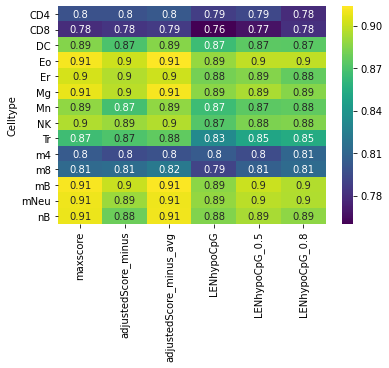

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


3.715272903442383
